In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from scipy import stats
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore") # Ignores all warnings

In [2]:
train = pd.read_csv("/kaggle/input/burnout-datathon-ieeecsmuj/train.csv")
test = pd.read_csv("/kaggle/input/burnout-datathon-ieeecsmuj/test.csv")
val = pd.read_csv("/kaggle/input/burnout-datathon-ieeecsmuj/val.csv")

In [ ]:
# train.info()
# train.describe()

In [5]:
from sklearn.preprocessing import LabelEncoder

encoders = []
for col in train.columns:
    if train[col].dtypes == "object":
        encoders.append(LabelEncoder())

i = 0
for col in train.columns:
    if train[col].dtypes == "object":
        train[col] = encoders[i].fit_transform(train[col])
        i += 1

In [6]:
from sklearn.model_selection import train_test_split

X = train.drop(columns = ["Lap_Time_Seconds", "Unique ID", "Penalty"])
y = train["Lap_Time_Seconds"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size=0.01)

In [7]:
# from catboost import CatBoostRegressor


# # Improved CatBoostRegressor with tuned settings
# cm = CatBoostRegressor(
#     task_type="GPU",
#     devices='0',                   # specify GPU device if needed
#     iterations=50000,               # more boosting rounds
#     learning_rate=0.03,            # smaller learning rate for stability
#     depth=8,                       # deeper trees for more complexity
#     l2_leaf_reg=3,                 # regularization
#     random_state=2,
#     verbose=2000                     # less verbose than 10000
# )

# cm.fit(X_train, y_train)

# # Predict + compute RMSE
# preds = cm.predict(X_test)
# crmse = np.sqrt(mean_squared_error(y_test, preds))
# print(crmse)

0.5713768135795115

In [8]:
from lightgbm import LGBMRegressor

# Create LGBM model with GPU and tuned params
lm = LGBMRegressor(
    device='gpu',             # Enable GPU
    boosting_type='gbdt',     # GPU works with gbdt, dart
    random_state=2,
    verbose=-1,
    n_estimators=95000,        # More trees (you can tune this)
    learning_rate=0.05,       # Smaller learning rate
    num_leaves=31,            # Default, can tune
    max_depth=-1              # No limit, can tune
)

# Train model
lm.fit(X_train, y_train)

# Predict + compute RMSE
preds = lm.predict(X_test)
lrmse = np.sqrt(mean_squared_error(y_test, preds))

print(lrmse)

1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


0.020106337925348893


0.07623064485363776

In [9]:
i = 0
for col in val.columns:
    if val[col].dtypes == "object":
        val[col] = encoders[i].fit_transform(val[col])
        i += 1

X1 = val.drop(columns=["Lap_Time_Seconds", "Unique ID", "Penalty"])
y1 = val["Lap_Time_Seconds"]
print("Eval")
# print(np.sqrt(mean_squared_error(cm.predict(X1), y1)))
print(np.sqrt(mean_squared_error(lm.predict(X1), y1)))

Eval
0.291636417955243


Eval
0.6223124288999167
0.30874695007994174

In [10]:
test.head()

,Unique ID,Rider_ID,category_x,Circuit_Length_km,Laps,Grid_Position,Avg_Speed_kmh,Track_Condition,Humidity_%,Tire_Compound_Front,...,air,ground,starts,finishes,with_points,podiums,wins,min_year,max_year,years_active
0,288307,6533,MotoGP,5.316,19,1,284.38,Dry,44,Hard,...,16,19,92,86,47,2,0,1981,1993,13
1,704288,4800,Moto2,3.861,19,2,328.98,Dry,43,Hard,...,28,47,406,373,365,178,111,1996,2021,26
2,951491,7907,Moto3,3.954,18,21,165.56,Dry,77,Soft,...,27,46,138,134,120,13,7,1993,2007,15
3,2591721,4844,Moto3,4.074,21,21,258.46,Dry,74,Medium,...,21,29,83,70,37,0,0,1998,2007,10
4,1202653,4802,Moto2,4.096,25,21,319.60,Dry,84,Hard,...,27,46,134,115,105,5,2,1998,2010,13


In [11]:
i = 0
for col in test.columns:
    if test[col].dtypes == "object":
        test[col] = encoders[i].fit_transform(test[col])
        i += 1

# Drop unwanted columns
X_submit = test.drop(columns=["Unique ID", "Penalty"])

# Predict using your trained LightGBM model
preds = lm.predict(X_submit)

# Create submission DataFrame
submission = pd.DataFrame({
    "Unique ID": test["Unique ID"],
    "Lap_Time_Seconds": preds
})

# Save to CSV
submission.to_csv("submission.csv", index=False)

print("Submission file saved as submission.csv")
submission.head()

Submission file saved as submission.csv


,Unique ID,Lap_Time_Seconds
0,288307,89.946256
1,704288,104.076768
2,951491,86.296527
3,2591721,109.788692
4,1202653,99.332312


In [12]:
sub = pd.read_csv("/kaggle/working/submission.csv")
sub.head()

,Unique ID,Lap_Time_Seconds
0,288307,89.946256
1,704288,104.076768
2,951491,86.296527
3,2591721,109.788692
4,1202653,99.332312


<Axes: xlabel='Lap_Time_Seconds', ylabel='Count'>

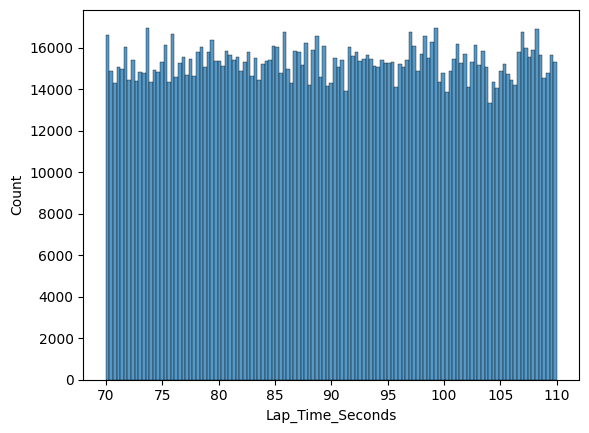

In [13]:
sns.histplot(x = "Lap_Time_Seconds", data = train)

<Axes: xlabel='Lap_Time_Seconds', ylabel='Count'>

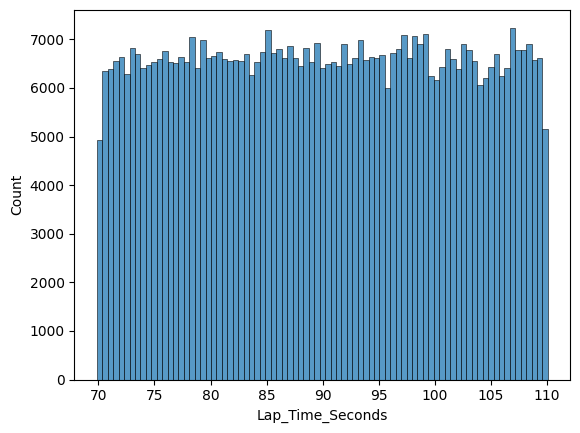

In [14]:
sns.histplot(x = "Lap_Time_Seconds", data = sub)